### Evaluating Ethnicolr on North Carolina Voter Registration Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ncvoter_Statewide.zip', delimiter='\t', nrows=10)
df.head()

,county_id,county_desc,voter_reg_num,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,...,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,age,ncid,vtd_abbrv,vtd_desc
0,1,ALAMANCE,9005990,A,ACTIVE,AV,VERIFIED,,,AABEL,...,NaN,15A,15A PROSECUTORIAL,,,N,Age Over 66,AA56273,08N,08N
1,1,ALAMANCE,9048723,A,ACTIVE,AV,VERIFIED,,,AARON,...,BURLINGTON,15A,15A PROSECUTORIAL,,,N,Age 26 - 40,AA98377,03S,03S
2,1,ALAMANCE,9019674,A,ACTIVE,AV,VERIFIED,,,AARON,...,BURLINGTON,15A,15A PROSECUTORIAL,,,N,Age Over 66,AA69747,124,124
3,1,ALAMANCE,9129589,A,ACTIVE,AV,VERIFIED,,,AARON,...,NaN,15A,15A PROSECUTORIAL,,,N,Age Over 66,AA170513,08N,08N
4,1,ALAMANCE,9041748,A,ACTIVE,AV,VERIFIED,,,AARON,...,BURLINGTON,15A,15A PROSECUTORIAL,,,N,Age 26 - 40,AA91549,03S,03S


In [3]:
df.columns

Index(['county_id', 'county_desc', 'voter_reg_num', 'status_cd',
       'voter_status_desc', 'reason_cd', 'voter_status_reason_desc',
       'absent_ind', 'name_prefx_cd', 'last_name', 'first_name', 'middle_name',
       'name_suffix_lbl', 'res_street_address', 'res_city_desc', 'state_cd',
       'zip_code', 'mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4',
       'mail_city', 'mail_state', 'mail_zipcode', 'full_phone_number',
       'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_age',
       'birth_state', 'drivers_lic', 'registr_dt', 'precinct_abbrv',
       'precinct_desc', 'municipality_abbrv', 'municipality_desc',
       'ward_abbrv', 'ward_desc', 'cong_dist_abbrv', 'super_court_abbrv',
       'judic_dist_abbrv', 'nc_senate_abbrv', 'nc_house_abbrv',
       'county_commiss_abbrv', 'county_commiss_desc', 'township_abbrv',
       'township_desc', 'school_dist_abbrv', 'school_dist_desc',
       'fire_dist_abbrv', 'fire_dist_desc', 'water_dist_abbrv',
       'water

In [4]:
df = pd.read_csv('ncvoter_Statewide.zip', delimiter='\t', usecols=['last_name', 'first_name', 'race_code', 'gender_code', 'ethnic_code', 'birth_age'])
df.head()

,last_name,first_name,race_code,ethnic_code,gender_code,birth_age
0,AABEL,EVELYN,W,NL,F,81
1,AARON,CHRISTINA,W,UN,F,40
2,AARON,CLAUDIA,W,NL,F,72
3,AARON,JAMES,W,UN,M,69
4,AARON,NATHAN,W,UN,M,40


In [5]:
df.groupby(['ethnic_code', 'race_code']).size()

ethnic_code  race_code
HL           A                721
             B               6288
             I                719
             M              12158
             O              79737
             U              36007
             W              47255
NL                              1
             A              56906
             B            1273955
             I              51815
             M              23159
             O              83157
             U              18397
             W            4511174
UN                              2
             A              30438
             B             450583
             I               9608
             M              17402
             O              19847
             U             204858
             W             804727
dtype: int64

In [6]:
df.to_csv('/opt/data/nc_voter/nc_voter_name_gender_race_ethnic_age.csv', index=False)

In [7]:
df = pd.read_csv('/opt/data/nc_voter/nc_voter_name_gender_race_ethnic_age.csv')
df.head()

,last_name,first_name,race_code,ethnic_code,gender_code,birth_age
0,AABEL,EVELYN,W,NL,F,81
1,AARON,CHRISTINA,W,UN,F,40
2,AARON,CLAUDIA,W,NL,F,72
3,AARON,JAMES,W,UN,M,69
4,AARON,NATHAN,W,UN,M,40


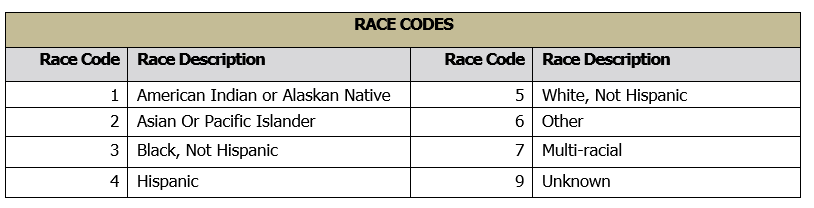

In [8]:
from ethnicolr import pred_fl_reg_name

Using TensorFlow backend.


In [9]:
odf = pred_fl_reg_name(df, lname_col='last_name', fname_col='first_name')
odf.head()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




,last_name,first_name,race_code,ethnic_code,gender_code,birth_age,race,asian,hispanic,nh_black,nh_white
0,AABEL,EVELYN,W,NL,F,81,nh_white,0.026478,0.074987,0.023811,0.874724
1,AARON,CHRISTINA,W,UN,F,40,nh_white,0.006734,0.017828,0.162495,0.812943
2,AARON,CLAUDIA,W,NL,F,72,nh_white,0.002667,0.061856,0.177148,0.758328
3,AARON,JAMES,W,UN,M,69,nh_white,0.002847,0.001917,0.183722,0.811515
4,AARON,NATHAN,W,UN,M,40,nh_white,0.011188,0.012027,0.144476,0.832309


In [10]:
#odf.to_csv('/opt/data/nc_voter/nc_voter_name_gender_race_ethnic_age+pred_fl_reg_name.csv.gz', index=False, compression='gzip')

In [11]:
pd.crosstab(odf['race_code'], odf['race'])

race,asian,hispanic,nh_black,nh_white
race_code,,,,
,0,0,0,3
A,52537,4425,4045,27023
B,7055,14387,581251,1128110
I,1341,1337,7303,52161
M,1135,7802,8732,35048
O,21049,82400,11080,68202
U,5869,39904,32842,180626
W,8490,79923,180621,5093931


In [12]:
pd.crosstab(odf['ethnic_code'], odf['race'])

race,asian,hispanic,nh_black,nh_white
ethnic_code,,,,
HL,652,130373,6381,45474
NL,66277,71899,596955,5283236
UN,30547,27906,222538,1256394


In [13]:
odf['ethnic_race'] = odf['ethnic_code'] + '+' + odf['race_code']
odf.head()

,last_name,first_name,race_code,ethnic_code,gender_code,birth_age,race,asian,hispanic,nh_black,nh_white,ethnic_race
0,AABEL,EVELYN,W,NL,F,81,nh_white,0.026478,0.074987,0.023811,0.874724,NL+W
1,AARON,CHRISTINA,W,UN,F,40,nh_white,0.006734,0.017828,0.162495,0.812943,UN+W
2,AARON,CLAUDIA,W,NL,F,72,nh_white,0.002667,0.061856,0.177148,0.758328,NL+W
3,AARON,JAMES,W,UN,M,69,nh_white,0.002847,0.001917,0.183722,0.811515,UN+W
4,AARON,NATHAN,W,UN,M,40,nh_white,0.011188,0.012027,0.144476,0.832309,UN+W


In [14]:
pd.crosstab(odf['ethnic_race'], odf['race'])

race,asian,hispanic,nh_black,nh_white
ethnic_race,,,,
HL+A,101,377,38,205
HL+B,23,1713,1766,2786
HL+I,8,406,43,262
HL+M,94,5949,1053,5061
HL+O,227,63702,1662,14144
HL+U,93,28279,773,6860
HL+W,106,29947,1046,16156
NL+,0,0,0,1
NL+A,33998,2681,2504,17699


Comparison # 1:
---------------

Accuracy using Known-Known:

1. (race_code == 'B') & (ethnic_code == 'NL') ==> nh_black
2. (race_code == 'W') & (ethnic_code == 'NL') ==> nh_white


In [15]:
odf['nc_race'] = odf.ethnic_race
odf.dropna(subset=['nc_race']) # remove missing
odf.loc[(odf.race_code=='B') & (odf.ethnic_code=='NL'), 'nc_race'] = 'nh_black'
odf.loc[(odf.race_code=='W') & (odf.ethnic_code=='NL'), 'nc_race'] = 'nh_white'

comp_1 = odf[odf.nc_race.isin(["nh_black", "nh_white"])]
comp_1.shape

(5785129, 13)

In [16]:
cf = pd.crosstab(comp_1['nc_race'], comp_1['race'])
print(cf)

# Total
print("Total N", cf.values.sum())

# TP/Total 
print("NH Black:",(cf.values[0,2]/cf.values[0,].sum()).round(2))
print("NH White:", (cf.values[1,3]/cf.values[1,].sum()).round(2))
print("Accuracy:", ((cf.values[0,2] + cf.values[1,3])/cf.values.sum()).round(2))

race      asian  hispanic  nh_black  nh_white
nc_race                                      
nh_black   4654      9368    420805    839118
nh_white   6898     41707    154001   4308413
Total N 5784964
NH Black: 0.33
NH White: 0.96
Accuracy: 0.82


Comparison #2: Low FP
------------------------

1. (race_code == 'B') & (ethnic_code == 'NL') ==> nh_black
2. (race_code == 'W') & (ethnic_code == 'NL') ==> nh_white
3. ((race_code == 'W') & (ethnic_code == 'HL')) | ((race_code == 'B') & (ethnic_code == 'HL')) ==> hispanic
4. (race_code == 'A') & (ethnic_code == 'NL') ==> asian


In [17]:
odf['nc_race_low_fp'] = odf.ethnic_race
odf.loc[(odf.race_code=='B') & (odf.ethnic_code=='NL'), 'nc_race_low_fp'] = 'nh_black'
odf.loc[(odf.race_code=='W') & (odf.ethnic_code=='NL'), 'nc_race_low_fp'] = 'nh_white'
odf.loc[((odf.race_code == 'W') & (odf.ethnic_code == 'HL')) |
        ((odf.race_code == 'B') & (odf.ethnic_code == 'HL')), 'nc_race_low_fp'] = 'hispanic'
odf.loc[(odf.race_code == 'A') & (odf.ethnic_code == 'NL'), 'nc_race_low_fp'] = 'asian'
odf

comp_2 = odf[odf.nc_race_low_fp.isin(["nh_black", "nh_white", "hispanic", "asian"])]
comp_2.shape

(5895578, 14)

In [18]:
cf = pd.crosstab(comp_2['nc_race_low_fp'], comp_2['race'])
print(cf)

print("Total N", cf.values.sum())

# accuracy
print("Accuracy", np.diag(cf.values).sum()/cf.values.sum())

# tp/total
cf["sum"] = cf.values.sum(axis = 1)
cf.loc[:,"asian":"nh_white"].div(cf["sum"], axis = 0)

race            asian  hispanic  nh_black  nh_white
nc_race_low_fp                                     
asian           33998      2681      2504     17699
hispanic          129     31660      2812     18942
nh_black         4654      9368    420805    839118
nh_white         6898     41707    154001   4308413
Total N 5895389
Accuracy 0.8133264827817129


race,asian,hispanic,nh_black,nh_white
nc_race_low_fp,,,,
asian,0.597693,0.047133,0.044021,0.311153
hispanic,0.002409,0.591300,0.052519,0.353772
nh_black,0.003653,0.007354,0.330316,0.658677
nh_white,0.001529,0.009246,0.034139,0.955086


Comparison #3: Low FN
-----------------------
1. (race_code == 'B') & (ethnic_code == 'NL') ==> nh_black
2. (race_code == 'W') & (ethnic_code == 'NL') ==> nh_white
3. ethnic_code == 'HL' ==> hispanic
4. (race_code == 'A') & (ethnic_code == 'NL') ==> asian

In [19]:
odf['nc_race_low_fn'] = odf.ethnic_race
odf.loc[(odf.race_code=='B') & (odf.ethnic_code=='NL'), 'nc_race_low_fn'] = 'nh_black'
odf.loc[(odf.race_code=='W') & (odf.ethnic_code=='NL'), 'nc_race_low_fn'] = 'nh_white'
odf.loc[(odf.ethnic_code=='HL'), 'nc_race_low_fn'] = 'nc_hispanic'
odf.loc[(odf.race_code=='A') & (odf.ethnic_code=='NL'), 'nc_race_low_fn'] = 'nc_asian'
odf

comp_3 = odf[odf.nc_race_low_fn.isin(["nh_black", "nh_white", "nc_hispanic", "nc_asian"])]
comp_3.shape

(6024920, 15)

In [20]:
cf = pd.crosstab(comp_3['nc_race_low_fn'], comp_3['race'])
print(cf)

print("Total N", cf.values.sum())


# accuracy
print("Accuracy", np.diag(cf.values).sum()/cf.values.sum())

# tp/total
cf["sum"] = cf.values.sum(axis = 1)
cf.loc[:,"asian":"nh_white"].div(cf["sum"], axis = 0)

# accuracy
#(np.diag(cf.values).sum())/cf.values.sum()

race            asian  hispanic  nh_black  nh_white
nc_race_low_fn                                     
nc_asian        33998      2681      2504     17699
nc_hispanic       652    130373      6381     45474
nh_black         4654      9368    420805    839118
nh_white         6898     41707    154001   4308413
Total N 6024726
Accuracy 0.8122508807869436


race,asian,hispanic,nh_black,nh_white
nc_race_low_fn,,,,
nc_asian,0.597693,0.047133,0.044021,0.311153
nc_hispanic,0.003565,0.712888,0.034892,0.248655
nh_black,0.003653,0.007354,0.330316,0.658677
nh_white,0.001529,0.009246,0.034139,0.955086
